In [1]:
from chardet.universaldetector import UniversalDetector

detector = UniversalDetector()
detector.reset()

filepath = "./user_tag_query.10W.TRAIN"
for each in open(filepath, 'rb'):
    detector.feed(each)
    if detector.done:
        break
detector.close()
fileencoding = detector.result['encoding']
confidence = detector.result['confidence']

if fileencoding == "GB2312" or "GBK":
    fileencoding = "GB18030"
print(fileencoding)
print(confidence)

GB18030
0.99


In [4]:
# 首先读取文件

import ray
import datetime
start=datetime.datetime.now()

data = open('./user_tag_query.10W.TRAIN', 'r', encoding=fileencoding)
all_loginfo = []

for line in data:
    # 对第一行所有内容进行制表符拆分
    line_pre = line.split('\t')
    valid_info = line_pre[4:]
    
    all_loginfo.extend(valid_info)
    # 测试一下日志中总共有多少条记录
print(len(all_loginfo))

file_name = 'all_logs.txt'
    # 打开文件以写入模式
with open(file_name, 'w', encoding='utf-8') as file:
    # 逐行写入列表中的数据
    for words in all_loginfo:
        file.write(words + '\n')
        
#中间写代码块
end=datetime.datetime.now()
print('Running time: %s Seconds'%(end-start))

2023-10-24 21:37:12,452	INFO worker.py:1642 -- Started a local Ray instance.


14273095
Running time: 0:00:47.709540 Seconds


In [13]:
# 过滤掉无效内容
import re
data = open('./all_logs.txt', 'r', encoding='utf-8')
pattern = r'https?://\S+|www\.\S+|[\w.-]+@[\w.-]+|'
file_name = 're_filter.txt'
fil_loginfo = []
count = 0
for word in data:
    filtered_line = re.sub(pattern, '', word)
     # 打印经过过滤的行（如果不为空）
    if filtered_line.strip():  # 检查经过过滤后的行是否不为空
        fil_loginfo.append(filtered_line)
with open(file_name, 'w', encoding='utf-8') as file:
    # 逐行写入列表中的数据
    for words in fil_loginfo:
        file.write(words)

柔和双沟



In [52]:
import jieba

sep_list = []
data = open('./re_filter.txt', encoding='utf-8')
for word in data:
    word = word.strip()
    seg_list = jieba.cut(word, cut_all=False)
    Seg_list = list(seg_list)
    sep_list.extend(Seg_list)

file_name = 'jieba_words.txt'
    # 打开文件以写入模式
with open(file_name, 'w', encoding='utf-8') as file:
    # 逐行写入列表中的数据
    for words in sep_list:
        file.write(words + '\n')

In [23]:
stop_words = "stop_words.txt"
stop_words_dict = open(stop_words, 'r', encoding='utf-8')
stop_words_contents = stop_words_dict.read()
stop_words_list = stop_words_contents.splitlines()
stop_words_dict.close()

word_list = []
data = open('./jieba_words.txt', encoding='utf-8')
for word in data:
    word = word.strip()
    word_list.append(word)

def remove_stop_words(word_list, stop_words):
    word_cleaned = []
    for word in word_list:
        if word not in stop_words:
            word_cleaned.append(word)
    return word_cleaned

word_list = remove_stop_words(word_list, stop_words_list)

print(len(word_list))

file_name = 'stopwords_filter.txt'
    # 打开文件以写入模式
with open(file_name, 'w', encoding='utf-8') as file:
    # 逐行写入列表中的数据
    for words in word_list:
        file.write(words + '\n')

44071225


In [3]:
# 下面统计所有关键词的出现次数
from collections import Counter

word_list = []
data = open('./stopwords_filter.txt', encoding='utf-8')
for word in data:
    word = word.strip()
    word_list.append(word)

from collections import Counter

result = []
count_result = Counter(word_list)
for key,val in count_result.most_common(2000):
    key_val = "关键字：" + key + "||" + "出现次数：" + str(val)
    print(key_val)
    result.append(key_val)
    
file_name = 'seeds_keyvalue.txt'
    # 打开文件以写入模式
with open(file_name, 'w', encoding='utf-8') as file:
    # 逐行写入列表中的数据
    for words in result:
        file.write(words + '\n')

关键字：图片||出现次数：291066
关键字：手机||出现次数：191395
关键字：意思||出现次数：190842
关键字：小说||出现次数：159798
关键字：视频||出现次数：157483
关键字：2016||出现次数：144186
关键字：下载||出现次数：134916
关键字：大全||出现次数：131459
关键字：吃||出现次数：128020
关键字：钱||出现次数：103222
关键字：qq||出现次数：98473
关键字：电影||出现次数：96576
关键字：中国||出现次数：94104
关键字：说||出现次数：86231
关键字：世界||出现次数：85065
关键字：做||出现次数：76293
关键字：年||出现次数：76049
关键字：重生||出现次数：72730
关键字：百度||出现次数：68067
关键字：会||出现次数：67662
关键字：官网||出现次数：66639
关键字：txt||出现次数：65475
关键字：英语||出现次数：64913
关键字：月||出现次数：63798
关键字：电视剧||出现次数：63334
关键字：游戏||出现次数：61145
关键字：中||出现次数：61050
关键字：查询||出现次数：60950
关键字：网||出现次数：60271
关键字：做法||出现次数：60019
关键字：一个||出现次数：59776
关键字：倾城||出现次数：57944
关键字：荣耀||出现次数：57394
关键字：版||出现次数：57072
关键字：里||出现次数：54000
关键字：苹果||出现次数：53629
关键字：号||出现次数：53224
关键字：怀孕||出现次数：52838
关键字：时间||出现次数：52717
关键字：微微一笑||出现次数：52503
关键字：大学||出现次数：52146
关键字：字||出现次数：52074
关键字：王者||出现次数：52006
关键字：爱||出现次数：51940
关键字：软件||出现次数：51686
关键字：电脑||出现次数：50156
关键字：阅读||出现次数：49857
关键字：学院||出现次数：49763
关键字：漫画||出现次数：49250
关键字：微信||出现次数：49249
关键字：全集||出现次数：48666
关键字：价格||出现次数：48635
关键字：成语||出现

In [1]:
# 工具方法：测试词义相似度
# 认为两个词义高度近似的词在竞度分析中是没有意义的
# 并解决一个词包含另一个词引起的搜索量消失问题
import spacy
def word_similarity(word1, word2):
#     nlp = spacy.load('zh_core_web_sm')
#     doc1 = nlp(word1)
#     doc2 = nlp(word2)
#     similarity = doc1.similarity(doc2)
    similarity = 0 
    if word1 in word2 or word2 in word1:
        similarity = 0.95
    if similarity >= 0.9:
        return True  #true表示高度相似
    else:
        return False #false表示相似度较低

# 工具方法：判断一个目录是否存在，不存在则创建
def path_check(path):
    if not os.path.exists(path):
        os.makedirs(path)


In [3]:
# 下面是中介关键词的获得


# step1 进行有关搜索信息的提取
def seedwords_file(seedword, filename):
    origin_data = open('./re_filter.txt', encoding = 'utf-8')
    result_data = open(filename,'w',encoding='utf-8')
    for sentence in origin_data:
        if seedword in sentence:
            result_data.write(sentence)
    origin_data.close()
    result_data.close()

seedwords_list=['苹果','手机','上海','汽车','下载','视频','lol','电影','中国','淘宝','小米','百度','官网','英语','支付宝']
for seedword in seedwords_list:
    filename = './seedwords_agencywords/search_info/seedword_'+seedword+'.txt'
    seedwords_file(seedword,filename)

In [4]:
import jieba

# step2 对搜索信息进行jieba分词

# 对包含种子关键词的搜索信息进行jieba分词
def jieba_sep_searchInfo(seedword, filename):
    sep_list = []
    data = open('./seedwords_agencywords/search_info/seedword_'+ seedword + '.txt', encoding='utf-8')
    for word in data:
        word = word.strip()
        seg_list = jieba.cut(word, cut_all=False)
        Seg_list = list(seg_list)
        sep_list.extend(Seg_list)
            
        # 打开文件以写入模式
    with open(filename, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in sep_list:
            file.write(words + '\n')
            
seedwords_list=['苹果','手机','上海','汽车','下载','视频','lol','电影','中国','淘宝','小米','百度','官网','英语','支付宝']
for seedword in seedwords_list:
    filename = './seedwords_agencywords/jieba_search_info/seedword_'+seedword+'.txt'
    jieba_sep_searchInfo(seedword,filename)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\wang\AppData\Local\Temp\jieba.cache
Loading model cost 0.422 seconds.
Prefix dict has been built successfully.


In [5]:
# step3 对jieba分词结果停语词清洗

stop_words = "stop_words.txt"
stop_words_dict = open(stop_words, 'r', encoding='utf-8')
stop_words_contents = stop_words_dict.read()
stop_words_list = stop_words_contents.splitlines()
stop_words_dict.close()

def removeseed_stop_words(seedword, stop_words):
    word_list = []
    filename1 = './seedwords_agencywords/jieba_search_info/seedword_'+seedword+'.txt'
    data = open(filename1, encoding='utf-8')
    for word in data:
        word = word.strip()
        word_list.append(word)
        word_cleaned = []
    for word in word_list:
        if word not in stop_words:
            word_cleaned.append(word)
    filename2 = './seedwords_agencywords/stop_words_filter/seedword_'+seedword+'.txt'
    with open(filename2, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in word_cleaned:
            file.write(words + '\n')
            
#所用的种子关键词列表
seedwords_list=['苹果','手机','上海','汽车','下载','视频','lol','电影','中国','淘宝','小米','百度','官网','英语','支付宝']
for seedword in seedwords_list:
    removeseed_stop_words(seedword, stop_words_list)

In [7]:
# step4 停语词清洗后的结果进行出现出现次数统计

# 下面统计对于每个种子关键字而言，关联搜索信息中的中介关键词的出现次数
from collections import Counter

def get_s_sa(seedword, agencyword):
    s_num = 0
    sa_num = 0
    origin_data = open('./seedwords_agencywords/search_info/seedword_'+seedword+ '.txt', encoding = 'utf-8')
    for sentence in origin_data :
        if seedword in sentence:
            s_num += 1
        if agencyword in sentence:
            sa_num += 1
         
    origin_data.close()
    return s_num, sa_num

def seed_agent(filename, seedword):
    word_list = []
    result = []
    data = open('./seedwords_agencywords/stop_words_filter/seedword_'+ seedword + '.txt', encoding='utf-8')
    for word in data:
        word = word.strip()
        word_list.append(word)
    count_result = Counter(word_list)
    for key,val in count_result.most_common(100):
        if word_similarity(seedword, key):
            continue
        s_num, sa_num = get_s_sa(seedword, key)
        if key == seedword:
            key_val = "关键字：" + key + "||" + "出现次数：" + str(val) 
        else:
            key_val = "关键字：" + key + "||" + "出现次数：" + str(val) + "||" + "中介关键词权重：" + str(round(sa_num/s_num,8))
        result.append(key_val)
        
        # 对结果按中介关键词权重降序排列
    result.sort(key=lambda x: float(x.split("中介关键词权重：")[1]), reverse=True)
        
        # 打开文件以写入模式
    with open(filename, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in result:
            file.write(words + '\n')
            
seedwords_list=['苹果','手机','上海','汽车','下载','视频','lol','电影','中国','淘宝','小米','百度','官网','英语','支付宝']
for seedword in seedwords_list:
    filename = './seedwords_agencywords/agency_words/seedword_'+seedword+'.txt'
    seed_agent(filename,seedword)

In [8]:
import os
# 下面是备选竞争性关键词的获取

# step1 进行有关搜索信息的提取，将各个中介关键词的相关搜索都提取出来
def agencyword_record(agencyword, filename):
    origin_data = open('./re_filter.txt', encoding = 'utf-8')
    result_data = open(filename,'w',encoding='utf-8')
    for sentence in origin_data :
        if agencyword in sentence:
            result_data.write(sentence)
    origin_data.close()
    result_data.close()
    
# 从中介关键词存放的文件中读取出相关信息，这里只提取权重在前10的中介关键词
def get_agencywords(seedword):
    agencywords_list=[]
    agencywords_data = open('./seedwords_agencywords/agency_words/seedword_'+seedword+'.txt', encoding = 'utf-8')
    line_count = 0 
    for line in agencywords_data:
        data = line.split("||")  
        word = data[0][4:]
        if word == seedword:
            continue      #该关键词是种子关键词，则丢弃
        elif word_similarity(seedword,word):
            continue      #将相似度很高的词进行剔除
        agencywords_list.append(word)
        
        line_count += 1
        if line_count >= 10:
            break  # 达到10行后退出循环
    print("种子关键词",seedword,"的中介关键词列表为",agencywords_list)
    return agencywords_list


seedwords_list=['苹果','手机','上海','汽车','下载','视频','lol','电影','中国','淘宝','小米','百度','官网','英语','支付宝']
# 对每个种子关键词的中介关键词进行遍历
for seedword in seedwords_list:
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        path_check('./agencywords_compkey/search_info/seedword_'+seedword)
        filename = './agencywords_compkey/search_info/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt'
        agencyword_record(agencyword,filename)

种子关键词 苹果 的中介关键词列表为 ['机', '手机', '6s', '钱', '版', '官网', '6splus', '5s', '电脑', '图片']
种子关键词 手机 的中介关键词列表为 ['版', '网', '号', '下载', 'qq', '苹果', '软件', '卡', '游戏', '开']
种子关键词 上海 的中介关键词列表为 ['大学', '公司', '站', '有限公司', '路', '学院', '区', '火车', '号', '网']
种子关键词 汽车 的中介关键词列表为 ['站', '时刻表', '家', '之家', '图片', '报价', '公司', '大全', '有限公司', '钱']
种子关键词 下载 的中介关键词列表为 ['txt', '版', '手机', '全集', '网', '游戏', '软件', '免费', '小说', '云']
种子关键词 视频 的中介关键词列表为 ['在线', '舞', '教学', '大全', '观看', '手机', '发', '戏', '教程', '腾讯']
种子关键词 lol 的中介关键词列表为 ['皮肤', '英雄', '玩', '视频', '赛', '查询', '官网', '年', '2016', '卡']
种子关键词 电影 的中介关键词列表为 ['版', '网', '韩国', '在线', '完整版', '爱', '观看', '大全', '微', '全集']
种子关键词 中国 的中介关键词列表为 ['网', '新', '银行', '女排', '大学', '歌声', '2016', '代', '年', '奥运']
种子关键词 淘宝 的中介关键词列表为 ['店', '首页', '手机', '买', '卖', '号', '开', '下载', '退', '店铺']
种子关键词 小米 的中介关键词列表为 ['机', '手机', 'note', '官网', '版', '手环', 'max', '粥', '开', '卡']
种子关键词 百度 的中介关键词列表为 ['云', '资源', '贴', '盘', '下载', '百科', '版', '分享', '云盘', '地图']
种子关键词 官网 的中介关键词列表为 ['中', '学院', '大学', '网官', '手机', '手游', '中国', '苹果', '职业

In [9]:
import jieba

# step2 对搜索信息进行jieba分词

# 对包含中介关键词的搜索信息进行jieba分词
def jieba_sep_searchInfo(seedword, agencyword, filename):
    sep_list = []
    data = open('./agencywords_compkey/search_info/seedword_'+ seedword +'/agencyword_ '+agencyword + '.txt', encoding='utf-8')
    for word in data:
        word = word.strip()
        seg_list = jieba.cut(word, cut_all=False)
        Seg_list = list(seg_list)
        sep_list.extend(Seg_list)
            
        # 打开文件以写入模式
    with open(filename, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in sep_list:
            file.write(words + '\n')
            
            
seedwords_list=['苹果','手机','上海','汽车','下载','视频','lol','电影','中国','淘宝','小米','百度','官网','英语','支付宝']
for seedword in seedwords_list:
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        path_check('./agencywords_compkey/jieba_search_info/seedword_'+seedword)
        filename = './agencywords_compkey/jieba_search_info/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt'
        jieba_sep_searchInfo(seedword, agencyword, filename)

种子关键词 苹果 的中介关键词列表为 ['机', '手机', '6s', '钱', '版', '官网', '6splus', '5s', '电脑', '图片']
种子关键词 手机 的中介关键词列表为 ['版', '网', '号', '下载', 'qq', '苹果', '软件', '卡', '游戏', '开']
种子关键词 上海 的中介关键词列表为 ['大学', '公司', '站', '有限公司', '路', '学院', '区', '火车', '号', '网']
种子关键词 汽车 的中介关键词列表为 ['站', '时刻表', '家', '之家', '图片', '报价', '公司', '大全', '有限公司', '钱']
种子关键词 下载 的中介关键词列表为 ['txt', '版', '手机', '全集', '网', '游戏', '软件', '免费', '小说', '云']
种子关键词 视频 的中介关键词列表为 ['在线', '舞', '教学', '大全', '观看', '手机', '发', '戏', '教程', '腾讯']
种子关键词 lol 的中介关键词列表为 ['皮肤', '英雄', '玩', '视频', '赛', '查询', '官网', '年', '2016', '卡']
种子关键词 电影 的中介关键词列表为 ['版', '网', '韩国', '在线', '完整版', '爱', '观看', '大全', '微', '全集']
种子关键词 中国 的中介关键词列表为 ['网', '新', '银行', '女排', '大学', '歌声', '2016', '代', '年', '奥运']
种子关键词 淘宝 的中介关键词列表为 ['店', '首页', '手机', '买', '卖', '号', '开', '下载', '退', '店铺']
种子关键词 小米 的中介关键词列表为 ['机', '手机', 'note', '官网', '版', '手环', 'max', '粥', '开', '卡']
种子关键词 百度 的中介关键词列表为 ['云', '资源', '贴', '盘', '下载', '百科', '版', '分享', '云盘', '地图']
种子关键词 官网 的中介关键词列表为 ['中', '学院', '大学', '网官', '手机', '手游', '中国', '苹果', '职业

In [10]:
# step3 对jieba分词结果停语词清洗

stop_words = "stop_words.txt"
stop_words_dict = open(stop_words, 'r', encoding='utf-8')
stop_words_contents = stop_words_dict.read()
stop_words_list = stop_words_contents.splitlines()
stop_words_dict.close()

def removeseed_stop_words(seedword, agencyword, stop_words):
    word_list = []
    filename1 = './agencywords_compkey/jieba_search_info/seedword_'+seedword+'/agencyword_ '+agencyword +'.txt'
    data = open(filename1, encoding='utf-8')
    for word in data:
        word = word.strip()
        word_list.append(word)
        word_cleaned = []
    for word in word_list:
        if word not in stop_words:
            word_cleaned.append(word)
    filename2 = './agencywords_compkey/stop_words_filter/seedword_'+seedword+'/agencyword_ '+agencyword +'.txt'
    with open(filename2, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in word_cleaned:
            file.write(words + '\n')
            
seedwords_list=['苹果','手机','上海','汽车','下载','视频','lol','电影','中国','淘宝','小米','百度','官网','英语','支付宝']
for seedword in seedwords_list:
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        path_check('./agencywords_compkey/stop_words_filter/seedword_'+seedword)
        filename = './agencywords_compkey/stop_words_filter/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt'
        removeseed_stop_words(seedword, agencyword, stop_words_list)

种子关键词 苹果 的中介关键词列表为 ['机', '手机', '6s', '钱', '版', '官网', '6splus', '5s', '电脑', '图片']
种子关键词 手机 的中介关键词列表为 ['版', '网', '号', '下载', 'qq', '苹果', '软件', '卡', '游戏', '开']
种子关键词 上海 的中介关键词列表为 ['大学', '公司', '站', '有限公司', '路', '学院', '区', '火车', '号', '网']
种子关键词 汽车 的中介关键词列表为 ['站', '时刻表', '家', '之家', '图片', '报价', '公司', '大全', '有限公司', '钱']
种子关键词 下载 的中介关键词列表为 ['txt', '版', '手机', '全集', '网', '游戏', '软件', '免费', '小说', '云']
种子关键词 视频 的中介关键词列表为 ['在线', '舞', '教学', '大全', '观看', '手机', '发', '戏', '教程', '腾讯']
种子关键词 lol 的中介关键词列表为 ['皮肤', '英雄', '玩', '视频', '赛', '查询', '官网', '年', '2016', '卡']
种子关键词 电影 的中介关键词列表为 ['版', '网', '韩国', '在线', '完整版', '爱', '观看', '大全', '微', '全集']
种子关键词 中国 的中介关键词列表为 ['网', '新', '银行', '女排', '大学', '歌声', '2016', '代', '年', '奥运']
种子关键词 淘宝 的中介关键词列表为 ['店', '首页', '手机', '买', '卖', '号', '开', '下载', '退', '店铺']
种子关键词 小米 的中介关键词列表为 ['机', '手机', 'note', '官网', '版', '手环', 'max', '粥', '开', '卡']
种子关键词 百度 的中介关键词列表为 ['云', '资源', '贴', '盘', '下载', '百科', '版', '分享', '云盘', '地图']
种子关键词 官网 的中介关键词列表为 ['中', '学院', '大学', '网官', '手机', '手游', '中国', '苹果', '职业

In [11]:
# step4 停语词清洗后的结果进行出现出现次数统计

# 将所有的关键词进行保存
from collections import Counter

def find_compkey(seedword, agencyword, filename):
    word_list = []
    result = []
    data = open('./agencywords_compkey/stop_words_filter/seedword_'+ seedword +'/agencyword_ '+agencyword + '.txt', encoding='utf-8')
    for word in data:
        word = word.strip()
        word_list.append(word)
    count_result = Counter(word_list)
    for key,val in count_result.most_common(150):
        if key == agencyword:
            key_val = "中介关键字：" + key + "||" + "出现次数：" + str(val) 
        elif key == seedword:
            key_val = "种子关键字：" + key + "||" + "出现次数：" + str(val) 
        else:
            key_val = "竞争关键字：" + key + "||" + "出现次数：" + str(val) 
        result.append(key_val)
        # 打开文件以写入模式
    with open(filename, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in result:
            file.write(words + '\n')
            
seedwords_list=['苹果','手机','上海','汽车','下载','视频','lol','电影','中国','淘宝','小米','百度','官网','英语','支付宝']
for seedword in seedwords_list:
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        path_check('./agencywords_compkey/compkey_words/seedword_'+seedword)
        filename = './agencywords_compkey/compkey_words/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt'
        find_compkey(seedword, agencyword, filename)

种子关键词 苹果 的中介关键词列表为 ['机', '手机', '6s', '钱', '版', '官网', '6splus', '5s', '电脑', '图片']
种子关键词 手机 的中介关键词列表为 ['版', '网', '号', '下载', 'qq', '苹果', '软件', '卡', '游戏', '开']
种子关键词 上海 的中介关键词列表为 ['大学', '公司', '站', '有限公司', '路', '学院', '区', '火车', '号', '网']
种子关键词 汽车 的中介关键词列表为 ['站', '时刻表', '家', '之家', '图片', '报价', '公司', '大全', '有限公司', '钱']
种子关键词 下载 的中介关键词列表为 ['txt', '版', '手机', '全集', '网', '游戏', '软件', '免费', '小说', '云']
种子关键词 视频 的中介关键词列表为 ['在线', '舞', '教学', '大全', '观看', '手机', '发', '戏', '教程', '腾讯']
种子关键词 lol 的中介关键词列表为 ['皮肤', '英雄', '玩', '视频', '赛', '查询', '官网', '年', '2016', '卡']
种子关键词 电影 的中介关键词列表为 ['版', '网', '韩国', '在线', '完整版', '爱', '观看', '大全', '微', '全集']
种子关键词 中国 的中介关键词列表为 ['网', '新', '银行', '女排', '大学', '歌声', '2016', '代', '年', '奥运']
种子关键词 淘宝 的中介关键词列表为 ['店', '首页', '手机', '买', '卖', '号', '开', '下载', '退', '店铺']
种子关键词 小米 的中介关键词列表为 ['机', '手机', 'note', '官网', '版', '手环', 'max', '粥', '开', '卡']
种子关键词 百度 的中介关键词列表为 ['云', '资源', '贴', '盘', '下载', '百科', '版', '分享', '云盘', '地图']
种子关键词 官网 的中介关键词列表为 ['中', '学院', '大学', '网官', '手机', '手游', '中国', '苹果', '职业

In [12]:
import os
# 下面是comp竞度的计算和相关操作

# 获取文件中a、sa、ka的搜索量
def get_a_sa_ka(seedword, agencyword, compkey):
    a_num = 0
    sa_num = 0
    ka_num = 0
    origin_data = open('./agencywords_compkey/search_info/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt', encoding = 'utf-8')
    for sentence in origin_data :
        if seedword in sentence:
            if compkey in sentence:
                continue
            else:
                sa_num += 1
                a_num += 1
        else:
            if compkey in sentence:
                ka_num += 1
                a_num += 1
            else:
                a_num += 1
             
    origin_data.close()
    print("a:",a_num,"sa:",sa_num,"ka:",ka_num)
    return a_num, sa_num, ka_num
    
# 计算comp竞度
def cal_comp_a(a, sa, ka):
    return round(ka/(a - sa),8)

# 从文件中提取出竞争关键词   
def get_compkeys(seedword, agencyword):
    compkeys_list=[]
    compkeys_data = open('./agencywords_compkey/compkey_words/seedword_'+seedword +'/agencyword_ '+agencyword +'.txt', encoding = 'utf-8')
    line_count = 0 
    for line in compkeys_data:
        data = line.split("||")
        word = data[0][6:]
        if word == agencyword:
            continue
        if word == seedword:
            continue 
        if word_similarity(word,seedword):
            continue
        if word_similarity(word,agencyword):
            continue
        compkeys_list.append(word)
        
        line_count += 1
        if line_count >= 20:
            break  # 达到5行后退出循环
    print(compkeys_list)
    return compkeys_list

#保存comp竞度
def save_comp_a(result, filename):
    with open(filename, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in result:
            file.write(words + '\n')
    

seedwords_list=['苹果','手机','上海','汽车','下载','视频','lol','电影','中国','淘宝','小米','百度','官网','英语','支付宝']
for seedword in seedwords_list:
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        compkeys_list = get_compkeys(seedword, agencyword)
        result = []   #每一个中介关键词存一遍结果
        for compkey in compkeys_list:
            a_num, sa_num, ka_num = get_a_sa_ka(seedword, agencyword, compkey)
            comp = cal_comp_a(a_num, sa_num, ka_num)
            info = "种子关键词：" + seedword + "||" + "中介关键词：" + agencyword  + "||"  + "竞争关键词:" + compkey + "||" + "comp:" + str(comp)
            result.append(info)
        result.sort(key=lambda x: float(x.split("comp:")[1]), reverse=True)
        path_check('./result/seedword_'+seedword)
        filename = './result/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt'
        save_comp_a(result, filename)

种子关键词 苹果 的中介关键词列表为 ['机', '手机', '6s', '钱', '版', '官网', '6splus', '5s', '电脑', '图片']
['版', '下载', 'qq', '电脑', '软件', '视频', '华为', '设置', '图片', '世界', '钱', '游戏', '壁纸', '小米', '三星', '2016', '密码', '开', '玩', '显示']
a: 406538 sa: 11708 ka: 29782
a: 406427 sa: 11597 ka: 13919
a: 406678 sa: 11848 ka: 12169
a: 406656 sa: 11826 ka: 11090
a: 406453 sa: 11623 ka: 10646
a: 406664 sa: 11834 ka: 6887
a: 406847 sa: 12017 ka: 5784
a: 406336 sa: 11506 ka: 4995
a: 406678 sa: 11848 ka: 5722
a: 406849 sa: 12019 ka: 5040
a: 406545 sa: 11715 ka: 6795
a: 406695 sa: 11865 ka: 13560
a: 406782 sa: 11952 ka: 4169
a: 406847 sa: 12017 ka: 4142
a: 406827 sa: 11997 ka: 4005
a: 406850 sa: 12020 ka: 4280
a: 406564 sa: 11734 ka: 3919
a: 406254 sa: 11424 ka: 16756
a: 406731 sa: 11901 ka: 6383
a: 406620 sa: 11790 ka: 3748
['版', '下载', 'qq', '软件', '华为', '设置', '壁纸', '视频', '小米', '三星', '图片', '世界', '密码', '游戏', '在线', '银行', '微信', '玩', '屏幕', '电脑']
a: 212634 sa: 9901 ka: 26038
a: 212493 sa: 9760 ka: 11848
a: 212736 sa: 10003 ka: 11490
a: 212

a: 153748 sa: 12602 ka: 11271
a: 152766 sa: 11620 ka: 5778
a: 153859 sa: 12713 ka: 5933
a: 152777 sa: 11631 ka: 6436
a: 153801 sa: 12655 ka: 4075
a: 153820 sa: 12674 ka: 5462
a: 153832 sa: 12686 ka: 2868
a: 153075 sa: 11929 ka: 1893
a: 152588 sa: 11442 ka: 7180
a: 153783 sa: 12637 ka: 2477
a: 153570 sa: 12424 ka: 1920
a: 153840 sa: 12694 ka: 2653
a: 153860 sa: 12714 ka: 2127
a: 153786 sa: 12640 ka: 4592
a: 153814 sa: 12668 ka: 2451
a: 153665 sa: 12519 ka: 2267
a: 152951 sa: 11805 ka: 935
a: 153774 sa: 12628 ka: 2033
a: 152492 sa: 11346 ka: 424
['txt', '全集', '版', '软件', '免费', '游戏', '小说', '百度', '官方', '视频', 'qq', 'app', '云', '迅雷', '世界', '重生', '网', '优酷', '破解版', '系统']
a: 136317 sa: 12211 ka: 34575
a: 136368 sa: 12262 ka: 7633
a: 131019 sa: 6913 ka: 9212
a: 135341 sa: 11235 ka: 3806
a: 136028 sa: 11922 ka: 4460
a: 135668 sa: 11562 ka: 4293
a: 136270 sa: 12164 ka: 4327
a: 136116 sa: 12010 ka: 3045
a: 135735 sa: 11629 ka: 2613
a: 136005 sa: 11899 ka: 2680
a: 135617 sa: 11511 ka: 2480
a: 136239 

a: 127557 sa: 1223 ka: 5518
a: 127791 sa: 1457 ka: 20936
a: 127894 sa: 1560 ka: 2280
a: 127883 sa: 1549 ka: 1784
a: 127876 sa: 1542 ka: 4170
a: 127894 sa: 1560 ka: 1758
a: 127875 sa: 1541 ka: 1830
a: 127737 sa: 1403 ka: 1888
a: 127703 sa: 1369 ka: 23544
a: 127893 sa: 1559 ka: 1286
a: 127894 sa: 1560 ka: 1251
a: 127891 sa: 1557 ka: 1118
a: 127894 sa: 1560 ka: 1101
a: 127882 sa: 1548 ka: 1812
a: 127892 sa: 1558 ka: 1082
a: 127893 sa: 1559 ka: 1099
a: 127889 sa: 1555 ka: 886
['职业', '技术', '官网', '科技', '大学', '山东', '宿舍', '教务', '超', '湖南', '分数线', '贴', '江西', '2016', '四川', '校区', '广东', '几本', '河南', '地址']
a: 71092 sa: 1258 ka: 16962
a: 71107 sa: 1273 ka: 11565
a: 71212 sa: 1378 ka: 4183
a: 71261 sa: 1427 ka: 3414
a: 71088 sa: 1254 ka: 7913
a: 71265 sa: 1431 ka: 1873
a: 71210 sa: 1376 ka: 1765
a: 71246 sa: 1412 ka: 2294
a: 71265 sa: 1431 ka: 1851
a: 71265 sa: 1431 ka: 1603
a: 71186 sa: 1352 ka: 1439
a: 71261 sa: 1427 ka: 1452
a: 71265 sa: 1431 ka: 1433
a: 71237 sa: 1403 ka: 1330
a: 71265 sa: 1431 ka:

a: 136019 sa: 698 ka: 32353
a: 136289 sa: 968 ka: 13007
a: 136270 sa: 949 ka: 5906
a: 136274 sa: 953 ka: 4871
a: 136289 sa: 968 ka: 3844
a: 136277 sa: 956 ka: 4445
a: 136289 sa: 968 ka: 3371
a: 136289 sa: 968 ka: 2989
a: 136289 sa: 968 ka: 2975
a: 136288 sa: 967 ka: 2982
a: 136252 sa: 931 ka: 2594
a: 136282 sa: 961 ka: 2239
a: 136284 sa: 963 ka: 2297
a: 136268 sa: 947 ka: 10444
a: 136289 sa: 968 ka: 1986
a: 136289 sa: 968 ka: 1860
a: 136289 sa: 968 ka: 2014
a: 136289 sa: 968 ka: 1896
a: 136269 sa: 948 ka: 1758
a: 136289 sa: 968 ka: 1598
['科技', '股份', '上海', '集团', '北京', '招聘', '管理', '深圳', '电子', '投资', '广州', '深圳市', '食品', '中国', '工程', '服务', '实业', '商贸', '发展', '苏州']
a: 26904 sa: 879 ka: 4850
a: 26840 sa: 815 ka: 2340
a: 26854 sa: 829 ka: 1560
a: 26879 sa: 854 ka: 1939
a: 26883 sa: 858 ka: 1415
a: 26860 sa: 835 ka: 854
a: 26914 sa: 889 ka: 1004
a: 26908 sa: 883 ka: 1390
a: 26899 sa: 874 ka: 1392
a: 26914 sa: 889 ka: 763
a: 26898 sa: 873 ka: 751
a: 26914 sa: 889 ka: 616
a: 26914 sa: 889 ka: 619
a:

a: 137190 sa: 3958 ka: 2042
a: 136819 sa: 3587 ka: 1596
a: 137133 sa: 3901 ka: 1656
a: 137190 sa: 3958 ka: 1622
a: 137077 sa: 3845 ka: 4502
a: 137157 sa: 3925 ka: 1505
a: 136626 sa: 3394 ka: 1044
a: 137121 sa: 3889 ka: 1432
a: 137149 sa: 3917 ka: 1276
a: 137138 sa: 3906 ka: 1261
a: 136810 sa: 3578 ka: 890
a: 137189 sa: 3957 ka: 1323
种子关键词 视频 的中介关键词列表为 ['在线', '舞', '教学', '大全', '观看', '手机', '发', '戏', '教程', '腾讯']
['观看', '阅读', '直播', '电影', '手机', '超碰', '青青草', '免费', '全集', '卫视', '完整版', '影院', '小说', '翻译', 'qq', '百度', '湖南卫视', '英语', 'good', '电视剧']
a: 53144 sa: 4305 ka: 17371
a: 57130 sa: 8291 ka: 4884
a: 57062 sa: 8223 ka: 4516
a: 56974 sa: 8135 ka: 4174
a: 56593 sa: 7754 ka: 3007
a: 55425 sa: 6586 ka: 547
a: 55443 sa: 6604 ka: 464
a: 55904 sa: 7065 ka: 1436
a: 57033 sa: 8194 ka: 1768
a: 57130 sa: 8291 ka: 2359
a: 57052 sa: 8213 ka: 1211
a: 57003 sa: 8164 ka: 1113
a: 57129 sa: 8290 ka: 1164
a: 57130 sa: 8291 ka: 3789
a: 57121 sa: 8282 ka: 1025
a: 57122 sa: 8283 ka: 822
a: 57130 sa: 8291 ka: 809
a: 5

a: 65807 sa: 1881 ka: 1390
a: 65705 sa: 1779 ka: 1914
a: 65792 sa: 1866 ka: 1227
a: 65816 sa: 1890 ka: 1181
a: 65849 sa: 1923 ka: 1401
a: 65847 sa: 1921 ka: 1120
a: 65849 sa: 1923 ka: 927
a: 65628 sa: 1702 ka: 2274
a: 65837 sa: 1911 ka: 734
a: 65747 sa: 1821 ka: 835
a: 65842 sa: 1916 ka: 745
a: 65849 sa: 1923 ka: 670
a: 65849 sa: 1923 ka: 629
a: 65849 sa: 1923 ka: 608
['教学', '在线', '观看', '大全', '手机', '腾讯', '搞笑', '舞蹈', '下载', '王者', '2016', '荣耀', '直播', '青青草', '吻', '戏', '超碰', '微信', '马蓉', '播放']
a: 166655 sa: 1845 ka: 5225
a: 166718 sa: 1908 ka: 8286
a: 166723 sa: 1913 ka: 4669
a: 166705 sa: 1895 ka: 4868
a: 166716 sa: 1906 ka: 4446
a: 166719 sa: 1909 ka: 3290
a: 166670 sa: 1860 ka: 3050
a: 166722 sa: 1912 ka: 3021
a: 166714 sa: 1904 ka: 3054
a: 166718 sa: 1908 ka: 2651
a: 166616 sa: 1806 ka: 2736
a: 166723 sa: 1913 ka: 2513
a: 166663 sa: 1853 ka: 2403
a: 166720 sa: 1910 ka: 2428
a: 166723 sa: 1913 ka: 2944
a: 166715 sa: 1905 ka: 3983
a: 166723 sa: 1913 ka: 2265
a: 166723 sa: 1913 ka: 2422
a: 

a: 14348 sa: 4170 ka: 379
a: 14411 sa: 4233 ka: 202
a: 14300 sa: 4122 ka: 89
a: 14391 sa: 4213 ka: 177
a: 14354 sa: 4176 ka: 377
a: 14416 sa: 4238 ka: 183
a: 14416 sa: 4238 ka: 174
['公寓', '图片', '说', '小说', '公主', '会员', '病', '歌词', '下载', '贤者', '视频', '总裁', '大全', '电视剧', '免费', '福原', '阅读', 'txt', '拍', '歌']
a: 187700 sa: 3887 ka: 4275
a: 187695 sa: 3882 ka: 4578
a: 187691 sa: 3878 ka: 8867
a: 187707 sa: 3894 ka: 4356
a: 187711 sa: 3898 ka: 3801
a: 187694 sa: 3881 ka: 3666
a: 187712 sa: 3899 ka: 3824
a: 187708 sa: 3895 ka: 2949
a: 187671 sa: 3858 ka: 2870
a: 187703 sa: 3890 ka: 2861
a: 187652 sa: 3839 ka: 2674
a: 187711 sa: 3898 ka: 2404
a: 187491 sa: 3678 ka: 2216
a: 187703 sa: 3890 ka: 2076
a: 187659 sa: 3846 ka: 2114
a: 187712 sa: 3899 ka: 2077
a: 187711 sa: 3898 ka: 2020
a: 187711 sa: 3898 ka: 2023
a: 187710 sa: 3897 ka: 2409
a: 187695 sa: 3882 ka: 6993
['在线', '视频', '免费', '直播', '全集', '手机', '完整版', '卫视', '青青草', '电视剧', '鬼父', '影院', 'good', '韩国', '高清', '超碰', '动漫', '在线视频', '金瓶梅', '版']
a: 23665 sa:

a: 96815 sa: 3526 ka: 1160
a: 96848 sa: 3559 ka: 1337
a: 96807 sa: 3518 ka: 1008
a: 96847 sa: 3558 ka: 892
a: 96029 sa: 2740 ka: 34
a: 96848 sa: 3559 ka: 1049
a: 96848 sa: 3559 ka: 799
a: 96813 sa: 3524 ka: 1029
a: 96845 sa: 3556 ka: 784
a: 96810 sa: 3521 ka: 725
a: 96848 sa: 3559 ka: 1030
a: 96846 sa: 3557 ka: 763
a: 96843 sa: 3554 ka: 711
a: 96847 sa: 3558 ka: 719
a: 96848 sa: 3559 ka: 697
['2016', '上册', '月', '英语', '答案', '语文', '数学', '日', '2015', '级', '小学', '时间', '钱', '属', '2017', '人教版', '放假', '考试', '作文', '运势']
a: 215832 sa: 2836 ka: 35141
a: 216256 sa: 3260 ka: 12273
a: 216111 sa: 3115 ka: 15663
a: 216265 sa: 3269 ka: 7117
a: 216269 sa: 3273 ka: 5358
a: 216270 sa: 3274 ka: 5647
a: 216274 sa: 3278 ka: 5211
a: 216116 sa: 3120 ka: 8563
a: 216077 sa: 3081 ka: 4001
a: 216209 sa: 3213 ka: 32956
a: 216267 sa: 3271 ka: 4030
a: 216267 sa: 3271 ka: 4111
a: 216258 sa: 3262 ka: 3970
a: 216275 sa: 3279 ka: 5107
a: 216249 sa: 3253 ka: 3005
a: 216276 sa: 3280 ka: 2442
a: 216277 sa: 3281 ka: 2332
a:

a: 406789 sa: 4084 ka: 30033
a: 406796 sa: 4091 ka: 14288
a: 406861 sa: 4156 ka: 12352
a: 406847 sa: 4142 ka: 12017
a: 406847 sa: 4142 ka: 11281
a: 406828 sa: 4123 ka: 11021
a: 406819 sa: 4114 ka: 7042
a: 406823 sa: 4118 ka: 5760
a: 406670 sa: 3965 ka: 5329
a: 406826 sa: 4121 ka: 5870
a: 406869 sa: 4164 ka: 5060
a: 406798 sa: 4093 ka: 7048
a: 406859 sa: 4154 ka: 13724
a: 406857 sa: 4152 ka: 4244
a: 406856 sa: 4151 ka: 4034
a: 406840 sa: 4135 ka: 4270
a: 406776 sa: 4071 ka: 4131
a: 406551 sa: 3846 ka: 17053
a: 406846 sa: 4141 ka: 6498
a: 406780 sa: 4075 ka: 3908
['版', '下载', 'qq', '苹果', '软件', '华为', '设置', '壁纸', '视频', '三星', '图片', '世界', '密码', '游戏', '在线', '银行', '微信', '玩', '屏幕', '电脑']
a: 212883 sa: 3337 ka: 26287
a: 212868 sa: 3322 ka: 12223
a: 212918 sa: 3372 ka: 11672
a: 212909 sa: 3363 ka: 10176
a: 212885 sa: 3339 ka: 9660
a: 212882 sa: 3336 ka: 5025
a: 212757 sa: 3211 ka: 4032
a: 212914 sa: 3368 ka: 4209
a: 212890 sa: 3344 ka: 4416
a: 212913 sa: 3367 ka: 3362
a: 212885 sa: 3339 ka: 3501
a

a: 36540 sa: 4296 ka: 371
a: 36460 sa: 4216 ka: 790
['下载', '电脑', 'txt', '360', '固态', '系统', '手机', '机械', '笔记本', '图片', '资源', '重生', '启动', '新', 'by', '安装', '设置', '分享', '视频', '钱']
a: 57007 sa: 3943 ka: 2532
a: 57293 sa: 4229 ka: 2824
a: 57237 sa: 4173 ka: 1951
a: 57255 sa: 4191 ka: 2032
a: 57298 sa: 4234 ka: 1825
a: 57296 sa: 4232 ka: 1731
a: 57257 sa: 4193 ka: 1173
a: 57295 sa: 4231 ka: 1143
a: 57298 sa: 4234 ka: 1462
a: 57294 sa: 4230 ka: 1004
a: 56668 sa: 3604 ka: 512
a: 57285 sa: 4221 ka: 805
a: 57299 sa: 4235 ka: 882
a: 57272 sa: 4208 ka: 1511
a: 57295 sa: 4231 ka: 645
a: 57299 sa: 4235 ka: 598
a: 57297 sa: 4233 ka: 530
a: 56885 sa: 3821 ka: 94
a: 57208 sa: 4144 ka: 475
a: 57299 sa: 4235 ka: 556
['txt', '手机', '全集', '版', '软件', '免费', '游戏', '小说', '官方', '视频', 'qq', 'app', '云', '迅雷', '世界', '重生', '网', '优酷', '破解版', '系统']
a: 136147 sa: 3076 ka: 34405
a: 136116 sa: 3045 ka: 12010
a: 136358 sa: 3287 ka: 7623
a: 136073 sa: 3002 ka: 14266
a: 136367 sa: 3296 ka: 4832
a: 136357 sa: 3286 ka: 4789
a: 1

a: 34139 sa: 2147 ka: 820
a: 34121 sa: 2129 ka: 670
a: 34215 sa: 2223 ka: 737
a: 34215 sa: 2223 ka: 723
a: 34195 sa: 2203 ka: 601
a: 34215 sa: 2223 ka: 608
a: 34214 sa: 2222 ka: 583
a: 34157 sa: 2165 ka: 523
a: 34186 sa: 2194 ka: 535
['新', '歌声', '2016', '声音', '地图', '排名', '关系', '奥运会', '视频', '营业厅', '图片', '里', '年', '约', '十大', '日本', '美国', '网上', '国旗', '城市']
a: 122754 sa: 2015 ka: 7636
a: 122774 sa: 2035 ka: 4548
a: 122779 sa: 2040 ka: 3605
a: 122781 sa: 2042 ka: 2796
a: 122780 sa: 2041 ka: 2747
a: 122782 sa: 2043 ka: 2719
a: 122781 sa: 2042 ka: 2270
a: 122782 sa: 2043 ka: 1915
a: 122782 sa: 2043 ka: 1835
a: 122699 sa: 1960 ka: 1619
a: 122781 sa: 2042 ka: 1676
a: 122779 sa: 2040 ka: 2659
a: 122773 sa: 2034 ka: 3273
a: 122782 sa: 2043 ka: 1742
a: 122782 sa: 2043 ka: 1569
a: 122782 sa: 2043 ka: 1386
a: 122777 sa: 2038 ka: 1330
a: 122688 sa: 1949 ka: 1506
a: 122782 sa: 2043 ka: 1300
a: 122782 sa: 2043 ka: 1316
['手机', '6s', '钱', '6splus', '5s', '图片', '设置', '下载', '吃', 'id', '上市', '范冰冰', '软件', '视频

a: 465714 sa: 4395 ka: 3138
a: 465701 sa: 4382 ka: 3423
a: 465717 sa: 4398 ka: 3058
a: 465716 sa: 4397 ka: 2967
a: 465352 sa: 4033 ka: 5654
['写', '表', '上册', '必修', '软件', '级', '人教版', '开头', '八年级', '九年', '读', '大全', '高中', '背', '四级', '音标', '记', '发音', '下载', '七年级']
a: 8427 sa: 3504 ka: 617
a: 8041 sa: 3118 ka: 89
a: 8417 sa: 3494 ka: 17
a: 8616 sa: 3693 ka: 14
a: 8804 sa: 3881 ka: 201
a: 8122 sa: 3199 ka: 153
a: 8716 sa: 3793 ka: 11
a: 8874 sa: 3951 ka: 165
a: 8726 sa: 3803 ka: 5
a: 8731 sa: 3808 ka: 7
a: 8622 sa: 3699 ka: 130
a: 8814 sa: 3891 ka: 31
a: 8701 sa: 3778 ka: 20
a: 8812 sa: 3889 ka: 402
a: 8858 sa: 3935 ka: 68
a: 8883 sa: 3960 ka: 102
a: 8771 sa: 3848 ka: 183
a: 8890 sa: 3967 ka: 98
a: 8837 sa: 3914 ka: 41
a: 8806 sa: 3883 ka: 5
['语文', '答案', '数学', '八年级', '六年级', '人教版', '级', '九年', '五年级', '书', '七年级', '四年级', '三年级', '小学', '单元', '课本', '第一', '版', '二年级', '教案']
a: 13688 sa: 3574 ka: 3854
a: 13221 sa: 3107 ka: 2342
a: 13689 sa: 3575 ka: 2780
a: 12823 sa: 2709 ka: 1421
a: 13300 sa: 3186 ka: 1

In [43]:
#数据平滑函数
def smoothing(alpha, data_dict):
    average_data = sum(data_dict.values()) / len(data_dict)  # 求数据的平均值
    
    smoothed_dict = {}
    for key, val in data_dict.items():
        smoothed_value = alpha * data_dict[key] + (1 - alpha) * average_data
        smoothed_dict[key] = smoothed_value
    return smoothed_dict

# 对权重进行平滑
def weight_smoothing(seedword, agencywords_list, tar_agencyword):
    alpha = 0.8   # 平滑指数
    weight_dict = {}
    for agencyword in agencywords_list:
        with open('./seedwords_agencywords/agency_words/seedword_'+seedword+'.txt', 'r', encoding='utf-8') as file:
            for record in file:
                info = record.split("||")
                if info[0][4:] == agencyword:
                    weight_value = float(info[2][8:])
                    weight_dict[agencyword] = weight_value
    weight_dict = smoothing(alpha, weight_dict)
    return weight_dict[tar_agencyword]

def cal_comp(seedword, compkey, agencywords_list):
    comp = 0   # comp的总和
    compkey_a_list = []  # 和compkey有关的agency
    for agencyword in agencywords_list:
        weight = 0
        comp_a = 0
        # 获取该a的weight
        with open('./seedwords_agencywords/agency_words/seedword_'+seedword+'.txt', 'r', encoding='utf-8') as file:
            for record in file:
                info = record.split("||")
                if info[0][4:] == agencyword:
                    weight = weight_smoothing(seedword, agencywords_list, agencyword)
        # 获取在a下的comp值
        with open('./result/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt', 'r', encoding='utf-8') as file:
            for record in file:
                info = record.split("||")
                if compkey == info[2][6:]:
                    comp_a = float(info[3][5:])
                    comp += comp_a * weight
                    compkey_a_list.append(agencyword)
    return comp, compkey_a_list
        
        
path_check('./comp')        

for i, seedword in enumerate(seedwords_list):
    # 创建一个空的二维列表
    all_compkey = []
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        compkeys_list = get_compkeys(seedword, agencyword)
        all_compkey.extend(compkeys_list)

    # 通过将列表转换为集合，然后再转换回列表来去除重复项
    all_compkey = list(set(all_compkey))
    
    all_info = []
    for compkey in all_compkey:
        comp, compkey_a_list = cal_comp(seedword, compkey, agencywords_list)
        one_info = "竞争关键词："+compkey+"||"+"comp:"+str(comp)+"||"+"用到的中介关键词:"+ ','.join(compkey_a_list)
        all_info.append(one_info)

    all_info.sort(key=lambda x: float(x.split("||")[1][5:]), reverse=True)
    with open('./comp/seedword_'+seedword+'.txt', 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for info in all_info:
            file.write(info + '\n')


种子关键词 苹果 的中介关键词列表为 ['机', '手机', '6s', '钱', '版', '官网', '6splus', '5s', '电脑', '图片']
['版', '下载', 'qq', '电脑', '软件', '视频', '华为', '设置', '图片', '世界', '钱', '游戏', '壁纸', '小米', '三星', '2016', '密码', '开', '玩', '显示']
['版', '下载', 'qq', '软件', '华为', '设置', '壁纸', '视频', '小米', '三星', '图片', '世界', '密码', '游戏', '在线', '银行', '微信', '玩', '屏幕', '电脑']
['钱', '区别', '手机', 'plus', '报价', '价格', 'vivo', '买', '图片', '降价', '屏幕', '设置', '港版', '国行', '换', 'iphone7', '功能', '三星', '内存', '上市']
['手机', '一斤', '一只', '做', '一盒', '微信', '2016', '一包', '一个月', '银行卡', '门票', '皮肤', '一瓶', '一年', '年', '软件', '买', '值', 'qq', '换']
['手机', '下载', '电影', '2016', '世界', 'qq', '答案', '上册', '电脑', '全集', '游戏', '视频', '高清', '英语', '百度', '在线', '大全', '网页', '观看', '饥荒']
['学院', '手机', '手游', '职业', '首页', 'lol', '12306', '小米', '中国', '技术', '下载', '查询', '网上', '大学', '网官', 'cf', '商城', '王者', '华为', '荣耀']
['钱', '区别', '报价', '价格', '手机', '6plus', '功能', '图片', '内存', '玫瑰', '金', '港版', '介绍', '降价', '换', '屏幕', '国行', '三星', '买', '二手']
['华为', '小米', '钱', '畅享', '手机', '畅想', '区别', '荣耀', '屏幕', '4g', '报价', 

种子关键词 电影 的中介关键词列表为 ['版', '网', '韩国', '在线', '完整版', '爱', '观看', '大全', '微', '全集']
['手机', '下载', '2016', '世界', 'qq', '答案', '上册', '电脑', '全集', '游戏', '视频', '高清', '英语', '百度', '在线', '大全', '苹果', '网页', '观看', '饥荒']
['书包', '手机', '下载', 'qq', '中国', '版', '营业厅', '首页', '学院', '查询', '电脑', '小说', '招聘', '2016', '女生', '韩剧', '买', '登录', '连接', 'txt']
['中国', '女主播', '电视剧', '视频', '在线', '观看', '最新', '2016', '博主晒', '排行榜', '完整版', '网', '图片', '版', '韩剧', '化妆品', '女', '明星', '女团', '面膜']
['观看', '视频', '阅读', '直播', '手机', '超碰', '青青草', '免费', '全集', '卫视', '完整版', '影院', '小说', '翻译', 'qq', '百度', '湖南卫视', '英语', 'good', '电视剧']
['观看', '在线', '视频', '高清', '国语', '2016', '韩国', '免费', '爱', '下载', '苹果', '百度', '2015', '年', '全集', '鸭王', '分钟', '云', '中国', '歌词']
['公寓', '图片', '说', '小说', '公主', '会员', '病', '歌词', '下载', '贤者', '视频', '总裁', '大全', '电视剧', '免费', '福原', '阅读', 'txt', '拍', '歌']
['在线', '视频', '免费', '直播', '全集', '手机', '完整版', '卫视', '青青草', '电视剧', '鬼父', '影院', 'good', '韩国', '高清', '超碰', '动漫', '在线视频', '金瓶梅', '版']
['图片', '做法', '名字', '视频', '游戏', '歌曲', '电视剧', '说', 'qq',

种子关键词 支付宝 的中介关键词列表为 ['账', '卡', '转', '银行', '银行卡', '转账', '手机', '钱', '号', '绑定']
['微信', '会员', '共享', '多久', '注册', '手机', '查询', '手续费', '银行', '银行卡', '爱奇艺', 'qq', '百度', '免费', '跨行', '提现', '淘宝', '信用卡', 'vip', '注销']
['手机', '图片', '钱', '银行', '办', '绑定', '查询', '申请', '头像', '办理', '电脑', '额度', '玩', '余额', '微信', 'qq', '联通', '中心', '教师节', '拉']
['微信', '手机', '银行卡', '手续费', '钱', '朋友圈', '视频', '脑筋', 'qq', '跨行', '银行', '多久', '软件', '一键', '图片', '流量', '未', '中', '小视频', '说']
['信用卡', '手机', '绑定', '电话', '查询', '余额', '转账', '中心', '钱', '密码', '官网', '办', '微信', '邮政储蓄', '手续费', '卡', '中国', '贷款', '申请', '开通']
['绑定', '余额', '微信', '钱', '办', '密码', '查询', '手机', '转账', '手机号', '号', '查', '身份证', '多久', '注销', '预留', '手续费', '开通', '激活', '短信']
['手续费', '微信', '跨行', '银行卡', '银行', '多久', '限额', '手机', '信用卡', '卡', '钱', '记录', '农行', '邮政', '骗', '异地', 'atm', '网银', '建行', '退回']
['版', '下载', 'qq', '苹果', '软件', '华为', '设置', '壁纸', '视频', '小米', '三星', '图片', '世界', '密码', '游戏', '在线', '银行', '微信', '玩', '屏幕']
['手机', '一斤', '苹果', '一只', '做', '一盒', '微信', '2016', '一包', '一个月', '银行卡', '门票',

In [4]:
import os

import spacy
def word_similarity(word1, word2):
#     nlp = spacy.load('zh_core_web_sm')
#     doc1 = nlp(word1)
#     doc2 = nlp(word2)
#     similarity = doc1.similarity(doc2)
    similarity = 0 
    if word1 in word2 or word2 in word1:
        similarity = 0.95
    if similarity >= 0.9:
        return True  #true表示高度相似
    else:
        return False #false表示相似度较低
    
# 工具方法：判断一个目录是否存在，不存在则创建
def path_check(path):
    if not os.path.exists(path):
        os.makedirs(path)

# 从中介关键词存放的文件中读取出相关信息，这里只提取权重在前10的中介关键词
def get_agencywords(seedword):
    agencywords_list=[]
    agencywords_data = open('./seedwords_agencywords/agency_words/seedword_'+seedword+'.txt', encoding = 'utf-8')
    line_count = 0 
    for line in agencywords_data:
        data = line.split("||")  
        word = data[0][4:]
        if word == seedword:
            continue      #该关键词是种子关键词，则丢弃
        elif word_similarity(seedword,word):
            continue      #将相似度很高的词进行剔除
        agencywords_list.append(word)
        
        line_count += 1
        if line_count >= 10:
            break  # 达到10行后退出循环
    print("种子关键词",seedword,"的中介关键词列表为",agencywords_list)
    return agencywords_list

seedwords_list=['苹果','手机','上海','汽车','下载','视频','lol','电影','中国','淘宝','小米','百度','官网','英语','支付宝']
path_check('./comp_plus')
for seedword in seedwords_list:
    agencywords_list = get_agencywords(seedword)
    with open('./comp/seedword_'+seedword+'.txt', 'r', encoding='utf-8') as file, open('./comp_plus/seedword_'+seedword+'.txt', 'w', encoding='utf-8') as outputfile:
        for record in file:
            info = record.split("||")
            compkey = info[0][6:]
            if compkey not in agencywords_list:
                outputfile.write(record)

种子关键词 苹果 的中介关键词列表为 ['机', '手机', '6s', '钱', '版', '官网', '6splus', '5s', '电脑', '图片']
种子关键词 手机 的中介关键词列表为 ['版', '网', '号', '下载', 'qq', '苹果', '软件', '卡', '游戏', '开']
种子关键词 上海 的中介关键词列表为 ['大学', '公司', '站', '有限公司', '路', '学院', '区', '火车', '号', '网']
种子关键词 汽车 的中介关键词列表为 ['站', '时刻表', '家', '之家', '图片', '报价', '公司', '大全', '有限公司', '钱']
种子关键词 下载 的中介关键词列表为 ['txt', '版', '手机', '全集', '网', '游戏', '软件', '免费', '小说', '云']
种子关键词 视频 的中介关键词列表为 ['在线', '舞', '教学', '大全', '观看', '手机', '发', '戏', '教程', '腾讯']
种子关键词 lol 的中介关键词列表为 ['皮肤', '英雄', '玩', '视频', '赛', '查询', '官网', '年', '2016', '卡']
种子关键词 电影 的中介关键词列表为 ['版', '网', '韩国', '在线', '完整版', '爱', '观看', '大全', '微', '全集']
种子关键词 中国 的中介关键词列表为 ['网', '新', '银行', '女排', '大学', '歌声', '2016', '代', '年', '奥运']
种子关键词 淘宝 的中介关键词列表为 ['店', '首页', '手机', '买', '卖', '号', '开', '下载', '退', '店铺']
种子关键词 小米 的中介关键词列表为 ['机', '手机', 'note', '官网', '版', '手环', 'max', '粥', '开', '卡']
种子关键词 百度 的中介关键词列表为 ['云', '资源', '贴', '盘', '下载', '百科', '版', '分享', '云盘', '地图']
种子关键词 官网 的中介关键词列表为 ['中', '学院', '大学', '网官', '手机', '手游', '中国', '苹果', '职业

种子关键词 小米 的中介关键词列表为 ['机', '手机', 'note', '官网', '版', '手环', 'max', '粥', '开', '卡']


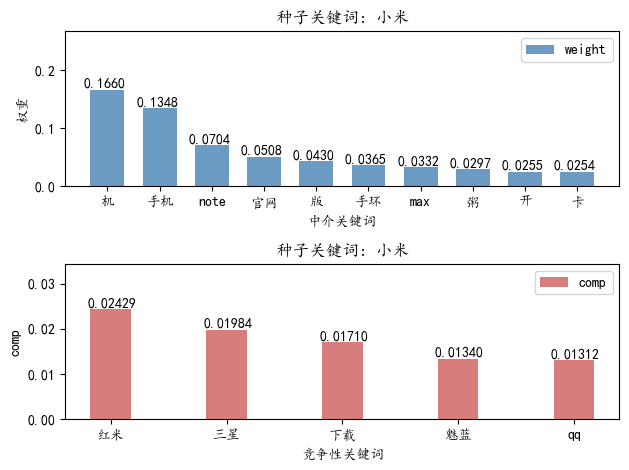

In [6]:
# 导入绘图模块
import matplotlib.pyplot as plt
import numpy as np

# 种子关键字选择
seedword = "小米"


comp_list = []
compkey_list = []

agencywords_list = []
weight_list = []

# 获取agencyword中介关键词和相应的权重
agencywords_list = get_agencywords(seedword)
for agencyword in agencywords_list:
        with open('./seedwords_agencywords/agency_words/seedword_'+seedword+'.txt', 'r', encoding='utf-8') as file:
            for record in file:
                info = record.split("||")
                if info[0][4:] == agencyword:
                    weight_value = float(info[2][8:])
                    weight_list.append(weight_value)
            

# 获取comp
with open('./comp_plus/seedword_'+seedword+'.txt', 'r', encoding='utf-8') as file:
        count = 0
        for record in file:
            info = record.split("||")
            comp_list.append(float(info[1][5:]))
            compkey_list.append(info[0][6:])
            count += 1
            if count == 5:
                break

# 构建数据
bar_width = 0.65

# 中文乱码的处理
plt.rcParams['font.sans-serif'] =["KaiTi"]
plt.rcParams['axes.unicode_minus'] = False
plt.subplot(2, 1, 1)  # 2行1列的子图，选择第1个子图
# 绘图,先绘制中介词和权重的图像
plt.bar(np.arange(10), weight_list, label = 'weight', color = 'steelblue', alpha = 0.8, width = bar_width)

# 添加轴标签
plt.xlabel('中介关键词')
plt.ylabel('权重')
# 添加标题
plt.title("种子关键词: " + seedword  )
# 添加刻度标签
plt.xticks(np.arange(10),agencywords_list)
# 设置Y轴的刻度范围
plt.ylim([0, weight_list[0]+0.1])

# 为每个条形图添加数值标签
for i,weight in enumerate(weight_list):
    plt.text(i-bar_width+0.2, weight, '{:.4f}'.format(weight), va='bottom')

# 显示图例
plt.legend()



# 构建数据
bar_width = 0.35
plt.subplot(2, 1, 2)  # 2行1列的子图，选择第2个子图
plt.bar(np.arange(5), comp_list, label = 'comp', color = 'indianred', alpha = 0.8, width = bar_width)
# 添加轴标签
plt.xlabel('竞争性关键词')
plt.ylabel('comp')
# 添加标题
plt.title("种子关键词: " + seedword  )
# 添加刻度标签
plt.xticks(np.arange(5),compkey_list)
# 设置Y轴的刻度范围
plt.ylim([0, comp_list[0]+0.01])
for i,comp in enumerate(comp_list):
    plt.text(i-0.2, comp, '{:.5f}'.format(comp), va='bottom')

# 显示图例
plt.legend()

# 调整子图的间距
plt.tight_layout()
# 显示图形
plt.show()

In [41]:
from gensim.models import FastText
import datetime
start=datetime.datetime.now()

# 加载预训练的 FastText 模型（.bin.gz 格式）
model_path = "./cc.zh.300.bin.gz"
model = FastText.load_fasttext_format(model_path)

# 定义两个词语
word1 = "中国"
word2 = "中国式"

# 计算两个词语的相似度
similarity = model.wv.similarity(word1, word2)

# 设置相似度阈值
threshold = 0.9

if similarity >= threshold:
    result = True  # 表示高度相似
else:
    result = False  # 表示相似度较低

print(f"词义相似度: {similarity}")
print(f"结果: {result}")

end=datetime.datetime.now()
print('Running time: %s Seconds'%(end-start))


C:\Users\wang\AppData\Local\Temp\ipykernel_12552\2805959169.py:7: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  model = FastText.load_fasttext_format(model_path)


词义相似度: 0.49831920862197876
结果: False
Running time: 0:03:35.771624 Seconds


In [7]:
import spacy
import datetime
start=datetime.datetime.now()

nlp = spacy.load('zh_core_web_sm')
doc1 = nlp("苹果")
doc2 = nlp("三星")
similarity = doc1.similarity(doc2)
# 设置相似度阈值
threshold = 0.9

if similarity >= threshold:
    result = True  # 表示高度相似
else:
    result = False  # 表示相似度较低
    
print(f"词义相似度: {similarity}")
print(f"结果: {result}")

end=datetime.datetime.now()
print('Running time: %s Seconds'%(end-start))

词义相似度: 0.31990665351600817
结果: False
Running time: 0:00:01.600998 Seconds


C:\Users\wang\AppData\Local\Temp\ipykernel_31508\107865338.py:8: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = doc1.similarity(doc2)


In [135]:
# 使用统计关键词出现次数的方式来快速定位高相关度的竞争性关键词
# 从文件中提取出竞争关键词   
def get_compkeys1(seedword, agencyword):
    compkeys_list=[]
    compkeys_data = open('./agencywords_compkey/compkey_words/seedword_'+seedword +'/agencyword_ '+agencyword +'.txt', encoding = 'utf-8')
    line_count = 0 
    for line in compkeys_data:
        data = line.split("||")
        word = data[0][6:]
        if word == agencyword:
            continue
        if word == seedword:
            continue 
        if word_similarity(word,seedword):
            continue
        if word_similarity(word,agencyword):
            continue
        compkeys_list.append(word)
        
        line_count += 1
        if line_count >= 5:
            break  # 达到5行后退出循环
    return compkeys_list


seedwords_list = ['苹果','手机','上海','汽车','下载','视频','lol','电影','中国','淘宝','小米','百度','官网','英语','支付宝']



for i, seedword in enumerate(seedwords_list):
    # 创建一个空的二维列表
    all_compkey = []
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        compkeys_list = get_compkeys1(seedword, agencyword)
        all_compkey.append(compkeys_list)

    # 创建一个字典来记录每个词在多少个 compkey_set 中存在
    word_count = {}

    for compkey_set in all_compkey:
        for word in compkey_set:
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1

    # 找到值最大的关键词
    most_common_word = max(word_count, key=word_count.get)

    print(f"值最大的关键词: {most_common_word}, 出现次数: {word_count[most_common_word]}")


种子关键词 图片 的中介关键词列表为 ['大全', '女', '画', '中', '字', '型', '男', '花', '发型', '带']
值最大的关键词: 大全, 出现次数: 4
种子关键词 手机 的中介关键词列表为 ['版', '网', '号', '下载', 'qq', '苹果', '软件', '卡', '游戏', '开']
值最大的关键词: 下载, 出现次数: 4
种子关键词 意思 的中介关键词列表为 ['a', 't', 's', 'c', 'm', 'b', '中', '梦见', '三', '老']
值最大的关键词: ., 出现次数: 6
种子关键词 小说 的中介关键词列表为 ['女', '网', '穿', '类', '男', '穿越', '女主', '阅读', '好看', '主角']
值最大的关键词: 图片, 出现次数: 3
种子关键词 视频 的中介关键词列表为 ['在线', '舞', '教学', '大全', '观看', '手机', '发', '戏', '教程', '腾讯']
值最大的关键词: 电影, 出现次数: 3
种子关键词 下载 的中介关键词列表为 ['txt', '版', '手机', '全集', '网', '游戏', '软件', '免费', '小说', '云']
值最大的关键词: 手机, 出现次数: 4
种子关键词 大全 的中介关键词列表为 ['图片', '做法', '字', '名字', '戏', '视频', '游戏', '电影', '歌曲', '电视剧']
值最大的关键词: 下载, 出现次数: 3
种子关键词 电影 的中介关键词列表为 ['版', '网', '韩国', '在线', '完整版', '爱', '观看', '大全', '微', '全集']
值最大的关键词: 视频, 出现次数: 5
种子关键词 中国 的中介关键词列表为 ['网', '新', '银行', '女排', '大学', '歌声', '2016', '代', '年', '奥运']
值最大的关键词: 2016, 出现次数: 5
种子关键词 世界 的中介关键词列表为 ['魔兽', '版', '两个', 'w', '异', '手机', '.', '从零开始', '生活', '中']
值最大的关键词: 手机, 出现次数: 3
种子关键词 重生 的中介关键词列表为 ['女', '小说',

In [109]:
#实验部分，用处不大，主要是进行jieba分词的词量与搜索量的探究

file_path = './seedwords_agencywords/search_info/seedword_图片' + '.txt'
line_count = 0
line_count2 = 0
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        if "大全" in line:
            line_count2 += 1
        if line.count("大全") >= 2:
            line_count += 1

print("文件有单行重复出现关键词的有", line_count, "行。","出现关键词的有",line_count2,'行')


file_path = './seedwords_agencywords/jieba_search_info/seedword_图片' + '.txt'
line_count = 0
line_count2 = 0
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        if "大全" in line:
            line_count2 += 1

print("jieba分词后的关键词数量有",line_count2,'行')


文件有单行重复出现关键词的有 98 行。 出现关键词的有 32623 行
jieba分词后的关键词数量有 32263 行
